In [53]:
!pip install xrft==0.3.0
!pip install numpy_groupies
!pip install rechunker
!pip install intake intake-xarray

In [2]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:43333")
client

Client Scheduler: tcp://127.0.0.1:43333 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 8 Cores: 64 Memory: 270.48 GB


In [43]:
client.restart()

Client Scheduler: tcp://127.0.0.1:40529 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 8 Cores: 32 Memory: 135.09 GB


In [54]:
import numpy as np
import xarray as xr
import pandas as pd
from scipy.ndimage import rotate
from xgcm.grid import Grid
import xrft
import s3fs
import matplotlib.colors as clr
import matplotlib.pyplot as plt
plt.rcParams['pcolor.shading'] = 'auto'
%matplotlib inline

In [55]:
import intake
import os
import gcsfs

gcs = gcsfs.GCSFileSystem(requester_pays=True)

SCRATCH = os.environ['SCRATCH_BUCKET']
SCRATCH

'gcs://meom-ige-scratch/roxyboy'

In [57]:
cat = intake.open_catalog('../SWOT-AdAC/catalog.yaml')
entries = list(cat._entries.keys())
entries

['GIGATL', 'HYCOM50', 'eNATL60', 'INALT60', 'FESOM']

## User parameters

Our catalog implements `intake` parameters, which allow the user to choose which region, depth, and season subset they would like to open for a given catalog entry. Below is a record of the currently implemented catalog entries, their parameters, and allowable arguments for each parameter. Note that allowable arguments may differ between entries.

In [58]:
for entry in entries:
    print(f"{entry} parameters and their allowable args are:")
    description = cat[entry].describe()
    params = description["user_parameters"]
    if len(params) != 0:
        for i in range(len(params)):
            print(f"""    {params[i]["name"]}: {params[i]["allowed"]}""")            
    else:
        print("    Not implemented.")
    print()

GIGATL parameters and their allowable args are:
    region: ['1', '2']
    depth: ['surf', 'int']
    season: ['fma', 'aso']

HYCOM50 parameters and their allowable args are:
    region: ['1_GS', '2_GE', '3_MD']
    depth: ['surf', 'int']
    season: ['fma', 'aso']

eNATL60 parameters and their allowable args are:
    region: ['1', '2', '3']
    depth: ['surface_hourly']
    season: ['fma', 'aso']

INALT60 parameters and their allowable args are:
    Not implemented.

FESOM parameters and their allowable args are:
    depth: ['surf']
    season: ['fma', 'aso']



# Load data
## eNATL60

In [75]:
# endpoint_url = 'https://ncsa.osn.xsede.org'
# fs_osn = s3fs.S3FileSystem(anon=True, client_kwargs={'endpoint_url': endpoint_url},)

# url = "s3://Pangeo/pangeo-forge/swot_adac/eNATL60/"
# enatl60_datasets = {
#     ds: xr.open_zarr(fs_osn.get_mapper(f"{url}{ds}.zarr"), consolidated=True)
#     for ds in ["Region01/surface_hourly/fma","Region01/surface_hourly/aso"]
# }


enatl01w = cat.eNATL60(region='1',depth='surface_hourly', season='fma').to_dask()
enatl01s = cat.eNATL60(region='1',depth='surface_hourly', season='aso').to_dask()
enatl01w

<xarray.Dataset>
Dimensions:        (time_counter: 2136, x: 611, y: 763)
Coordinates:
    depth          (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lat            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lat        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Dimensions without coordinates: x, y
Data variables:
    fmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    qt_oce         (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    somecrty       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sometauy       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosaline       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sossheig       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosstsst       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sowaflup       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozocrtx       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozotaux       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    tmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    umask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    vmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>

## HYCOM50

In [76]:
# endpoint_url = 'https://ncsa.osn.xsede.org'
# fs_osn = s3fs.S3FileSystem(anon=True, client_kwargs={'endpoint_url': endpoint_url},)

# url = "s3://Pangeo/pangeo-forge/swot_adac/HYCOM50/"
# hycom50_datasets = {
#     ds: xr.open_zarr(fs_osn.get_mapper(f"{url}{ds}.zarr"), consolidated=True, decode_times=False)
#     for ds in ["Region01_GS/surf/fma","Region01_GS/surf/aso"]
# }


hycom01w = cat.HYCOM50(region='1_GS', depth='surf', season='fma', decode_times=False).to_dask()
hycom01s = cat.HYCOM50(region='1_GS', depth='surf', season='aso', decode_times=False).to_dask()

In [69]:
endpoint_url = 'https://ncsa.osn.xsede.org'
fs_osn = s3fs.S3FileSystem(anon=True, client_kwargs={'endpoint_url': endpoint_url},)

url = "s3://Pangeo/pangeo-forge/swot_adac/HYCOM50/"
hycom50_grids = {
    grid: xr.open_zarr(fs_osn.get_mapper(f"{url}{grid}.zarr"), consolidated=True)
    for grid in ["grid_01"]
}

hycom50_grids

{'grid_01': <xarray.Dataset>
 Dimensions:    (lat: 615, lon: 503)
 Dimensions without coordinates: lat, lon
 Data variables:
     depth      (lat, lon) float64 dask.array<chunksize=(615, 503), meta=np.ndarray>
     latitude   (lat) float64 dask.array<chunksize=(615,), meta=np.ndarray>
     longitude  (lon) float64 dask.array<chunksize=(503,), meta=np.ndarray>}

## GIGATL

In [70]:
# Functions to adapt croco outputs to xgcm
##########################################

def adjust_coords(ds):

    if 'nav_lon_u' not in ds.coords:
        ##########################
        # for regular CROCO files:
        ds = ds.set_coords([c for c in ds.variables if 'lon' in c or 'lat' in c ])

    else:
        ##########################
        # for XIOS files:
        
        ds = ds.rename({'time_counter': 'time'})
        
        ds = ds.reset_coords([c for c in ds.coords if 'nav' in c])

        # rename redundant dimensions
        _dims = (d for d in ['x_v', 'y_u', 'x_w', 'y_w'] if d in ds.dims)
        for d in _dims:
            ds = ds.rename({d: d[0]+'_rho'})

        # change axis names to xi,eta (instead of x,y)
        _dims = (d for d in ['x_u', 'x_rho'] if d in ds.dims)
        for d in _dims:
            ds = ds.rename({d: 'xi' + d[1:]}) 

        _dims = (d for d in ['y_v', 'y_rho'] if d in ds.dims)
        for d in _dims:
            ds = ds.rename({d: 'eta' + d[1:]}) 


        # change nav variables to coordinates        
        _coords = [d for d in [d for d in ds.data_vars.keys()] if "nav_" in d]
        ds = ds.set_coords(_coords) 

        # rename coordinates 
        eta_suff={}
        for c in ds.coords:
            new_c = c.replace('nav_lat','lat').replace('nav_lon','lon')
            ds = ds.rename({c:new_c})
            # reset names and units
            ds[new_c] = (ds[new_c].assign_attrs(units='deg', 
                                               standard_name=new_c,
                                               long_name=new_c)
                        )

    ##########################
    # For all types  
    if 'eta_psi' in ds.dims: ds = ds.rename({'eta_psi': 'eta_v'}) 
    if 'xi_psi' in ds.dims: ds = ds.rename({'xi_psi': 'xi_u'}) 
        

    ##########################
    # Create xgcm grid
    coords={'xi':{'center':'xi_rho', 'inner':'xi_u'}, 
            'eta':{'center':'eta_rho', 'inner':'eta_v'}, 
            's':{'center':'s_rho', 'outer':'s_w'}}

    ds.attrs['xgcm-Grid'] = Grid(ds, coords=coords, periodic=[])


    return ds

    
def add_grd(ds,grd):
    
    ##########################
    for variable in grd.data_vars.keys():
        #print(variable)
        ds[variable] = grd[variable]
        
    ds['mask_rho'] = ds.mask_rho.where(ds.mask_rho>0,np.nan)
    
    if 'lon_psi' not in ds.coords: 
        #ds['lon_psi'] = grd['lon_psi']
        #ds['lat_psi'] = grd['lat_psi']
        ds = ds.assign_coords({'lon_psi':grd['lon_psi'], 'lat_psi':grd['lat_psi']})

    return ds
 
    ########

In [85]:
# endpoint_url = 'https://ncsa.osn.xsede.org'
# fs_osn = s3fs.S3FileSystem(anon=True, client_kwargs={'endpoint_url': endpoint_url},)

# url = "s3://Pangeo/pangeo-forge/swot_adac/GIGATL/"
# gigatl_datasets = {
#     ds: adjust_coords(xr.open_zarr(fs_osn.get_mapper(f"{url}{ds}.zarr"), consolidated=True))
#     for ds in ["Region01/surf/fma","Region01/surf/aso"]
# }


gigatl01w = adjust_coords(cat.GIGATL(region='1', depth='surf', season='fma').to_dask())
gigatl01s = adjust_coords(cat.GIGATL(region='1', depth='surf', season='aso').to_dask())
gigatl01s

<xarray.Dataset>
Dimensions:     (eta_rho: 1489, eta_v: 1488, time: 2280, xi_rho: 1491, xi_u: 1490)
Coordinates:
    lat         (eta_rho, xi_rho) float32 dask.array<chunksize=(1489, 1491), meta=np.ndarray>
    lon         (eta_rho, xi_rho) float32 dask.array<chunksize=(1489, 1491), meta=np.ndarray>
Dimensions without coordinates: eta_rho, eta_v, time, xi_rho, xi_u
Data variables:
    angle       (eta_rho, xi_rho) float32 dask.array<chunksize=(1489, 1491), meta=np.ndarray>
    f           (eta_rho, xi_rho) float32 dask.array<chunksize=(1489, 1491), meta=np.ndarray>
    h           (eta_rho, xi_rho) float32 dask.array<chunksize=(1489, 1491), meta=np.ndarray>
    ocean_time  (time) float32 dask.array<chunksize=(24,), meta=np.ndarray>
    pm          (eta_rho, xi_rho) float32 dask.array<chunksize=(1489, 1491), meta=np.ndarray>
    pn          (eta_rho, xi_rho) float32 dask.array<chunksize=(1489, 1491), meta=np.ndarray>
    salt        (time, eta_rho, xi_rho) float32 dask.array<chunksize=(24, 1489, 1491), meta=np.ndarray>
    temp        (time, eta_rho, xi_rho) float32 dask.array<chunksize=(24, 1489, 1491), meta=np.ndarray>
    u           (time, eta_rho, xi_u) float32 dask.array<chunksize=(24, 1489, 1490), meta=np.ndarray>
    v           (time, eta_v, xi_rho) float32 dask.array<chunksize=(24, 1488, 1491), meta=np.ndarray>
    zeta        (time, eta_rho, xi_rho) float32 dask.array<chunksize=(24, 1489, 1491), meta=np.ndarray>
Attributes:
    xgcm-Grid:  <xgcm.Grid>\nxi Axis (not periodic, boundary=None):\n  * cent...

## FESOM

In [78]:
fesom01w = cat.FESOM(depth='surf', season='fma').to_dask()
fesom01s = cat.FESOM(depth='surf', season='aso').to_dask()
fesom01s

<xarray.Dataset>
Dimensions:  (lat: 1000, lon: 1000, time: 2208)
Coordinates:
  * lat      (lat) float64 30.0 30.01 30.02 30.03 ... 39.97 39.98 39.99 40.0
  * lon      (lon) float64 -78.0 -77.99 -77.98 -77.97 ... -68.02 -68.01 -68.0
  * time     (time) datetime64[ns] 2012-08-01 ... 2012-10-31T23:00:00
Data variables:
    dflux    (time, lat, lon) float64 dask.array<chunksize=(10, 1000, 1000), meta=np.ndarray>
    ssh      (time, lat, lon) float64 dask.array<chunksize=(10, 1000, 1000), meta=np.ndarray>
    sss      (time, lat, lon) float64 dask.array<chunksize=(10, 1000, 1000), meta=np.ndarray>
    sst      (time, lat, lon) float64 dask.array<chunksize=(10, 1000, 1000), meta=np.ndarray>
    tx_sur   (time, lat, lon) float64 dask.array<chunksize=(10, 1000, 1000), meta=np.ndarray>
    ty_sur   (time, lat, lon) float64 dask.array<chunksize=(10, 1000, 1000), meta=np.ndarray>
    u_surf   (time, lat, lon) float64 dask.array<chunksize=(10, 1000, 1000), meta=np.ndarray>
    v_surf   (time, lat, lon) float64 dask.array<chunksize=(10, 1000, 1000), meta=np.ndarray>

## LLC4320

In [5]:
from xmitgcm import llcreader
model = llcreader.ECCOPortalLLC2160Model()
print(model.varnames)

['Eta', 'KPPhbl', 'oceFWflx', 'oceQnet', 'oceQsw', 'oceSflux', 'oceTAUX', 'oceTAUY', 'PhiBot', 'Salt', 'SIarea', 'SIheff', 'SIhsalt', 'SIhsnow', 'SIuice', 'SIvice', 'Theta', 'U', 'V', 'W']


In [6]:
llc01w = model.get_dataset(varnames=['Eta','U','V','Theta','Salt'], k_levels=[0], 
                           type='latlon').sel(time=slice('2012-02-01','2012-04-30'),
                                              j=slice(4778,5098),j_g=slice(4778,5098),
                                              i=slice(7679,7920),i_g=slice(7679,7920),
                                              k=0)
llc01w

<xarray.Dataset>
Dimensions:  (face: 13, i: 242, i_g: 242, j: 321, j_g: 321, k_l: 1, k_p1: 2, k_u: 1, time: 2160)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 7679 7680 7681 7682 7683 ... 7916 7917 7918 7919 7920
  * i_g      (i_g) int64 7679 7680 7681 7682 7683 ... 7916 7917 7918 7919 7920
  * j        (j) int64 4778 4779 4780 4781 4782 ... 5094 5095 5096 5097 5098
  * j_g      (j_g) int64 4778 4779 4780 4781 4782 ... 5094 5095 5096 5097 5098
    k        int64 0
  * k_u      (k_u) int64 0
  * k_l      (k_l) int64 0
  * k_p1     (k_p1) int64 0 1
  * time     (time) datetime64[ns] 2012-02-01 ... 2012-04-30T23:00:00
    CS       (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    SN       (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    Depth    (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    drC      (k_p1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    drF      >f4 dask.array<chunksize=(), meta=np.ndarray>
    dxC      (j, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    dxF      (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    dxG      (j_g, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    dyF      (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    hFacC    (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    hFacS    (j_g, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    hFacW    (j, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    PHrefC   >f4 dask.array<chunksize=(), meta=np.ndarray>
    PHrefF   (k_p1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    rA       (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    rAs      (j_g, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    rAw      (j, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    Z        >f4 dask.array<chunksize=(), meta=np.ndarray>
    Zp1      (k_p1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    rhoRef   >f4 dask.array<chunksize=(), meta=np.ndarray>
    rLowC    (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    rLowS    (j_g, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    rLowW    (j, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    rSurfC   (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    rSurfS   (j_g, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    rSurfW   (j, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    XC       (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    YC       (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    rAz      (j_g, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    XG       (j_g, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    YG       (j_g, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    dxV      (j_g, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    dyU      (j_g, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    Zl       (k_l) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    Zu       (k_u) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
Data variables:
    Eta      (time, j, i) float32 dask.array<chunksize=(1, 321, 242), meta=np.ndarray>
    U        (time, j, i_g) float32 dask.array<chunksize=(1, 321, 242), meta=np.ndarray>
    V        (time, j_g, i) float32 dask.array<chunksize=(1, 321, 242), meta=np.ndarray>
    Theta    (time, j, i) float32 dask.array<chunksize=(1, 321, 242), meta=np.ndarray>
    Salt     (time, j, i) float32 dask.array<chunksize=(1, 321, 242), meta=np.ndarray>

In [7]:
llc01s = model.get_dataset(varnames=['Eta','U','V','Theta','Salt'], k_levels=[0], 
                           type='latlon').sel(time=slice('2011-08-01','2011-10-31'),
                                              j=slice(4778,5098),j_g=slice(4778,5098),
                                              i=slice(7679,7920),i_g=slice(7679,7920),
                                              k=0)
llc01s

<xarray.Dataset>
Dimensions:  (face: 13, i: 242, i_g: 242, j: 321, j_g: 321, k_l: 1, k_p1: 2, k_u: 1, time: 2208)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 7679 7680 7681 7682 7683 ... 7916 7917 7918 7919 7920
  * i_g      (i_g) int64 7679 7680 7681 7682 7683 ... 7916 7917 7918 7919 7920
  * j        (j) int64 4778 4779 4780 4781 4782 ... 5094 5095 5096 5097 5098
  * j_g      (j_g) int64 4778 4779 4780 4781 4782 ... 5094 5095 5096 5097 5098
    k        int64 0
  * k_u      (k_u) int64 0
  * k_l      (k_l) int64 0
  * k_p1     (k_p1) int64 0 1
  * time     (time) datetime64[ns] 2011-08-01 ... 2011-10-31T23:00:00
    CS       (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    SN       (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    Depth    (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    drC      (k_p1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    drF      >f4 dask.array<chunksize=(), meta=np.ndarray>
    dxC      (j, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    dxF      (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    dxG      (j_g, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    dyF      (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    hFacC    (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    hFacS    (j_g, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    hFacW    (j, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    PHrefC   >f4 dask.array<chunksize=(), meta=np.ndarray>
    PHrefF   (k_p1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    rA       (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    rAs      (j_g, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    rAw      (j, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    Z        >f4 dask.array<chunksize=(), meta=np.ndarray>
    Zp1      (k_p1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    rhoRef   >f4 dask.array<chunksize=(), meta=np.ndarray>
    rLowC    (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    rLowS    (j_g, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    rLowW    (j, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    rSurfC   (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    rSurfS   (j_g, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    rSurfW   (j, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    XC       (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    YC       (j, i) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    rAz      (j_g, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    XG       (j_g, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    YG       (j_g, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    dxV      (j_g, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    dyU      (j_g, i_g) float32 dask.array<chunksize=(321, 242), meta=np.ndarray>
    Zl       (k_l) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    Zu       (k_u) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
Data variables:
    Eta      (time, j, i) float32 dask.array<chunksize=(1, 321, 242), meta=np.ndarray>
    U        (time, j, i_g) float32 dask.array<chunksize=(1, 321, 242), meta=np.ndarray>
    V        (time, j_g, i) float32 dask.array<chunksize=(1, 321, 242), meta=np.ndarray>
    Theta    (time, j, i) float32 dask.array<chunksize=(1, 321, 242), meta=np.ndarray>
    Salt     (time, j, i) float32 dask.array<chunksize=(1, 321, 242), meta=np.ndarray>

In [8]:
metrics = {
    ('X',): ['dxC', 'dxG'], # X distances
    ('Y',): ['dyC', 'dyG'], # Y distances
    ('Z',): ['drC'], # Z distances
    ('X', 'Y'): ['rA', 'rAs', 'rAw'] # Areas
}

gridl = Grid(llc01w, periodic=[],
             coords={'Y':{'center':'j','left':'j_g'},
                     'X':{'center':'i','left':'i_g'},
                     'Z':{'center':'k','outer':'k_p1'}
                     },
             metrics=metrics
            )
gridl

<xgcm.Grid>
Y Axis (not periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center
X Axis (not periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center
Z Axis (not periodic, boundary=None):
  * center   k --> outer
  * outer    k_p1 --> center

# Functions to isotropize spectra

In [72]:
def _binned_agg(
    array: np.ndarray,
    indices: np.ndarray,
    num_bins: int,
    *,
    func,
    fill_value,
    dtype,
) -> np.ndarray:
    """NumPy helper function for aggregating over bins."""

    try:
        import numpy_groupies
    except ImportError:
        raise ImportError(
            "This function requires the `numpy_groupies` package to be installed. Please install it with pip or conda."
        )

    mask = np.logical_not(np.isnan(indices))
    int_indices = indices[mask].astype(int)
    shape = array.shape[: -indices.ndim] + (num_bins,)
    result = numpy_groupies.aggregate(
        int_indices,
        array[..., mask],
        func=func,
        size=num_bins,
        fill_value=fill_value,
        dtype=dtype,
        axis=-1,
    )
    return result


def _groupby_bins_agg(
    array: xr.DataArray,
    group: xr.DataArray,
    bins,
    func="sum",
    fill_value=0,
    dtype=None,
    **cut_kwargs,
) -> xr.DataArray:
    """Faster equivalent of Xarray's groupby_bins(...).sum()."""
    # https://github.com/pydata/xarray/issues/4473
    binned = pd.cut(np.ravel(group), bins, **cut_kwargs)
    new_dim_name = group.name + "_bins"
    indices = group.copy(data=binned.codes.reshape(group.shape))

    result = xr.apply_ufunc(
        _binned_agg,
        array,
        indices,
        input_core_dims=[indices.dims, indices.dims],
        output_core_dims=[[new_dim_name]],
        output_dtypes=[array.dtype],
        dask_gufunc_kwargs=dict(
            allow_rechunk=True,
            output_sizes={new_dim_name: binned.categories.size},
        ),
        kwargs={
            "num_bins": binned.categories.size,
            "func": func,
            "fill_value": fill_value,
            "dtype": dtype,
        },
        dask="parallelized",
    )
    result.coords[new_dim_name] = binned.categories
    return result


def isotropize(ps, fftdim, nfactor=4, **kwargs):
    """
    Isotropize a 2D power spectrum or cross spectrum
    by taking an azimuthal average.
    .. math::
        \text{iso}_{ps} = k_r N^{-1} \sum_{N} |\mathbb{F}(da')|^2
    where :math:`N` is the number of azimuthal bins.
    Parameters
    ----------
    ps : `xarray.DataArray`
        The power spectrum or cross spectrum to be isotropized.
    fftdim : list
        The fft dimensions overwhich the isotropization must be performed.
    nfactor : int, optional
        Ratio of number of bins to take the azimuthal averaging with the
        data size. Default is 4.
    """

    # compute radial wavenumber bins
    k = ps[fftdim[1]]
    l = ps[fftdim[0]]

    N = [k.size, l.size]
    nbins = int(min(N) / nfactor)
    freq_r = np.sqrt(k ** 2 + l ** 2).rename("freq_r")
    kr = _groupby_bins_agg(freq_r, freq_r, bins=nbins, func="mean")

    if "truncate" in kwargs:
        if truncate:
            if k.max() > l.max():
                kmax = l.max()
            else:
                kmax = k.max()
            kr = kr.where(kr <= kmax)
        else:
            msg = (
                "The flag `truncate` will be set to True by default in future version "
                + "in order to truncate the isotropic wavenumber larger than the "
                + "Nyquist wavenumber."
            )
            warnings.warn(msg, FutureWarning)

    iso_ps = (
        _groupby_bins_agg(ps, freq_r, bins=nbins, func="mean")
        .rename({"freq_r_bins": "freq_r"})
        .drop_vars("freq_r")
    )
    iso_ps.coords["freq_r"] = kr.data
    if "truncate" in kwargs:
        if truncate:
            return (iso_ps * iso_ps.freq_r).dropna("freq_r")
    else:
        return iso_ps * iso_ps.freq_r

# Assume local Cartesian plane
## Sea-surface height

In [79]:
Ny = len(enatl01s.y)
Nx = len(enatl01s.x)
dx = enatl01s.e1t.mean(skipna=True)
dy = enatl01s.e2t.mean(skipna=True)

if 1/(2*dx) > 1/(2*dy):
    Kenatl = 1/(2*dy)
else:
    Kenatl = 1/(2*dx)
enatl01s_H = xr.DataArray(enatl01s.sossheig.data, dims=['time','YC','XC'],
                          coords={'time':np.arange(len(enatl01s.time_counter))*3600,
                                  'YC':np.arange(0,Ny*dy,dy),
                                  'XC':np.arange(0,Nx*dx,dx)}
                         ).chunk({'time':1})
enatl01s_H

<xarray.DataArray 'xarray-sossheig-2798297ca4e36f626c54678ff76c9e12' (time: 1464, YC: 763, XC: 611)>
dask.array<rechunk-merge, shape=(1464, 763, 611), dtype=float32, chunksize=(1, 763, 611), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 3600 7200 10800 ... 5256000 5259600 5263200 5266800
  * YC       (YC) float64 0.0 1.441e+03 2.882e+03 ... 1.097e+06 1.098e+06
  * XC       (XC) float64 0.0 1.514e+03 3.027e+03 ... 9.218e+05 9.233e+05

In [80]:
Ny = len(enatl01w.y)
Nx = len(enatl01w.x)
dx = enatl01w.e1t.mean(skipna=True)
dy = enatl01w.e2t.mean(skipna=True)

if 1/(2*dx) > 1/(2*dy):
    Kenatl = 1/(2*dy)
else:
    Kenatl = 1/(2*dx)
enatl01w_H = xr.DataArray(enatl01w.sossheig.data, dims=['time','YC','XC'],
                          coords={'time':np.arange(len(enatl01w.time_counter))*3600,
                                  'YC':np.arange(0,Ny*dy,dy),
                                  'XC':np.arange(0,Nx*dx,dx)}
                         ).chunk({'time':1})
enatl01w_H

<xarray.DataArray 'xarray-sossheig-6a088e224796da7a0750023e85b41a20' (time: 2136, YC: 763, XC: 611)>
dask.array<rechunk-merge, shape=(2136, 763, 611), dtype=float32, chunksize=(1, 763, 611), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 3600 7200 10800 ... 7675200 7678800 7682400 7686000
  * YC       (YC) float64 0.0 1.441e+03 2.882e+03 ... 1.097e+06 1.098e+06
  * XC       (XC) float64 0.0 1.514e+03 3.027e+03 ... 9.218e+05 9.233e+05

Text(0, 0.5, '[km]')

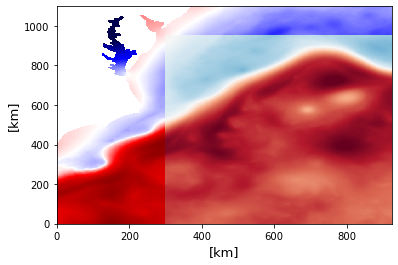

In [35]:
fig, ax = plt.subplots()
ax.pcolormesh(enatl01w_H.isel(time=0).XC*1e-3, enatl01w_H.isel(time=0).YC*1e-3,
              enatl01w_H.isel(time=0), cmap='seismic', vmax=1, vmin=-1)
ax.pcolormesh(enatl01w_H.isel(time=0).sel(YC=slice(None,9.5e5),XC=slice(3e5,None)).XC*1e-3,
              enatl01w_H.isel(time=0).sel(YC=slice(None,9.5e5),XC=slice(3e5,None)).YC*1e-3,
              enatl01w_H.isel(time=0).sel(YC=slice(None,9.5e5),XC=slice(3e5,None)), 
              cmap='RdBu_r', vmax=1, vmin=-1)
ax.set_xlabel("[km]", fontsize=13)
ax.set_ylabel("[km]", fontsize=13)

In [91]:
Ny = len(hycom50_grids["grid_01"].lat)
Nx = len(hycom50_grids["grid_01"].lon)
import gsw
xx, yy = np.meshgrid(hycom50_grids["grid_01"].longitude, hycom50_grids["grid_01"].latitude)
dx = xr.DataArray(gsw.distance(xx, yy), dims=['lat','lon'],
                  coords={'lat':np.arange(Ny),'lon':np.arange(.5,Nx-1,1)}
                 ).interp(lon=np.arange(Nx), method="linear",
                          kwargs={"fill_value": "extrapolate"}).mean()
dy = xr.DataArray(gsw.distance(xx, yy, axis=0), dims=['lat','lon'],
                  coords={'lat':np.arange(.5,Ny-1,1),'lon':np.arange(Nx)}
                 ).interp(lat=np.arange(Ny), method="linear",
                          kwargs={"fill_value": "extrapolate"}).mean()
if 1/(2*dx) > 1/(2*dy):
    Khycom = 1/(2*dy)
else:
    Khycom = 1/(2*dx)
hycom01w_H = xr.DataArray(hycom01w.ssh.data*1e-2, dims=['time','YC','XC'],
                          coords={'time':np.arange(len(hycom01w.time))*3600,
                                  'YC':np.arange(0,Ny*dy,dy),
                                  'XC':np.arange(0,Nx*dx,dx),
#                                   'month':('time',winter)
                                 }
                         ).chunk({'time':1})

hycom01w_H

<xarray.DataArray 'mul-0270bfc6cb507c874fea89ea2887ee11' (time: 2160, YC: 615, XC: 503)>
dask.array<rechunk-merge, shape=(2160, 615, 503), dtype=float32, chunksize=(1, 615, 503), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 3600 7200 10800 ... 7761600 7765200 7768800 7772400
  * YC       (YC) float64 0.0 1.817e+03 3.634e+03 ... 1.114e+06 1.116e+06
  * XC       (XC) float64 0.0 1.817e+03 3.634e+03 ... 9.103e+05 9.121e+05

In [92]:
hycom01s = hycom50_datasets["Region01_GS/surf/aso"]
Ny = len(hycom50_grids["grid_01"].lat)
Nx = len(hycom50_grids["grid_01"].lon)
import gsw
xx, yy = np.meshgrid(hycom50_grids["grid_01"].longitude, hycom50_grids["grid_01"].latitude)
dx = xr.DataArray(gsw.distance(xx, yy), dims=['lat','lon'],
                  coords={'lat':np.arange(Ny),'lon':np.arange(.5,Nx-1,1)}
                 ).interp(lon=np.arange(Nx), method="linear",
                          kwargs={"fill_value": "extrapolate"}).mean()
dy = xr.DataArray(gsw.distance(xx, yy, axis=0), dims=['lat','lon'],
                  coords={'lat':np.arange(.5,Ny-1,1),'lon':np.arange(Nx)}
                 ).interp(lat=np.arange(Ny), method="linear",
                          kwargs={"fill_value": "extrapolate"}).mean()
if 1/(2*dx) > 1/(2*dy):
    Khycom = 1/(2*dy)
else:
    Khycom = 1/(2*dx)
hycom01s_H = xr.DataArray(hycom01s.ssh.data*1e-2, dims=['time','YC','XC'],
                          coords={'time':np.arange(len(hycom01s.time))*3600,
                                  'YC':np.arange(0,Ny*dy,dy),
                                  'XC':np.arange(0,Nx*dx,dx),
#                                   'month':('time',winter)
                                 }
                         ).chunk({'time':1})

hycom01s_H

<xarray.DataArray 'mul-fe65a844748f3d4ce539ac19f890b57d' (time: 2208, YC: 615, XC: 503)>
dask.array<rechunk-merge, shape=(2208, 615, 503), dtype=float32, chunksize=(1, 615, 503), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 3600 7200 10800 ... 7934400 7938000 7941600 7945200
  * YC       (YC) float64 0.0 1.817e+03 3.634e+03 ... 1.114e+06 1.116e+06
  * XC       (XC) float64 0.0 1.817e+03 3.634e+03 ... 9.103e+05 9.121e+05

Text(0, 0.5, '[km]')

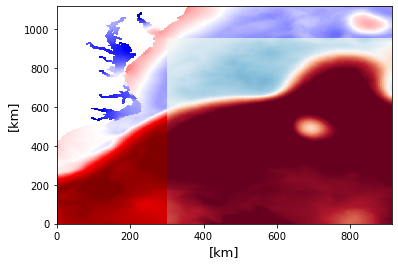

In [93]:
fig, ax = plt.subplots()
ax.pcolormesh(hycom01w_H.isel(time=0).XC*1e-3, hycom01w_H.isel(time=0).YC*1e-3,
              hycom01w_H.isel(time=0), cmap='seismic', vmax=1, vmin=-1)
ax.pcolormesh(hycom01w_H.isel(time=0).sel(YC=slice(None,9.5e5),XC=slice(3e5,None)).XC*1e-3,
              hycom01w_H.isel(time=0).sel(YC=slice(None,9.5e5),XC=slice(3e5,None)).YC*1e-3,
              hycom01w_H.isel(time=0).sel(YC=slice(None,9.5e5),XC=slice(3e5,None)), 
              cmap='RdBu_r', vmax=1, vmin=-1)
ax.set_xlabel("[km]", fontsize=13)
ax.set_ylabel("[km]", fontsize=13)

In [86]:
gridg = gigatl01w.attrs["xgcm-Grid"]
Ny = len(gigatl01w.eta_rho)
Nx = len(gigatl01w.xi_rho)
dx = (gigatl01w.pm**-1).mean(skipna=True)
dy = (gigatl01w.pn**-1).mean(skipna=True)

if 1/(2*dx) > 1/(2*dy):
    Kgigatl = 1/(2*dy)
else:
    Kgigatl = 1/(2*dx)
gigatl01w_H = xr.DataArray(gigatl01w.zeta.data, dims=['time','YC','XC'],
                           coords={'time':np.arange(len(gigatl01w.time))*3600,
                                   'YC':np.arange(0,(Ny)*dy,dy),
                                   'XC':np.arange(0,(Nx)*dx,dx)}
                          ).chunk({'YC':-1,'XC':-1})

gigatl01w_H

<xarray.DataArray 'xarray-zeta-008b35a2b22b7b1555fd924be6992731' (time: 2280, YC: 1489, XC: 1491)>
dask.array<xarray-zeta, shape=(2280, 1489, 1491), dtype=float32, chunksize=(24, 1489, 1491), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 3600 7200 10800 ... 8193600 8197200 8200800 8204400
  * YC       (YC) float64 0.0 956.4 1.913e+03 ... 1.421e+06 1.422e+06 1.423e+06
  * XC       (XC) float64 0.0 956.4 1.913e+03 ... 1.423e+06 1.424e+06 1.425e+06

In [87]:
gridg = gigatl01s.attrs["xgcm-Grid"]
Ny = len(gigatl01s.eta_rho)
Nx = len(gigatl01s.xi_rho)
dx = (gigatl01s.pm**-1).mean(skipna=True)
dy = (gigatl01s.pn**-1).mean(skipna=True)

if 1/(2*dx) > 1/(2*dy):
    Kgigatl = 1/(2*dy)
else:
    Kgigatl = 1/(2*dx)
gigatl01s_H = xr.DataArray(gigatl01s.zeta.data, dims=['time','YC','XC'],
                           coords={'time':np.arange(len(gigatl01s.time))*3600,
                                   'YC':np.arange(0,(Ny)*dy,dy),
                                   'XC':np.arange(0,(Nx)*dx,dx)}
                          ).chunk({'YC':-1,'XC':-1})

gigatl01s_H

<xarray.DataArray 'xarray-zeta-e0a9d8568c431b79045c5fab2d5c2d38' (time: 2280, YC: 1489, XC: 1491)>
dask.array<xarray-zeta, shape=(2280, 1489, 1491), dtype=float32, chunksize=(24, 1489, 1491), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 3600 7200 10800 ... 8193600 8197200 8200800 8204400
  * YC       (YC) float64 0.0 956.4 1.913e+03 ... 1.421e+06 1.422e+06 1.423e+06
  * XC       (XC) float64 0.0 956.4 1.913e+03 ... 1.423e+06 1.424e+06 1.425e+06

Text(0, 0.5, '[km]')

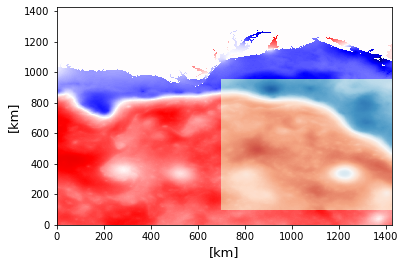

In [34]:
fig, ax = plt.subplots()
ax.pcolormesh(gigatl01w_H.isel(time=0).XC*1e-3, gigatl01w_H.isel(time=0).YC*1e-3,
              gigatl01w_H.isel(time=0), cmap='seismic', vmax=1., vmin=-1.)
ax.pcolormesh(gigatl01w_H.isel(time=0).sel(YC=slice(1e5,9.5e5),XC=slice(7e5,None)).XC*1e-3,
              gigatl01w_H.isel(time=0).sel(YC=slice(1e5,9.5e5),XC=slice(7e5,None)).YC*1e-3,
              gigatl01w_H.isel(time=0).sel(YC=slice(1e5,9.5e5),XC=slice(7e5,None)), 
              cmap='RdBu_r', vmax=1., vmin=-1.)
ax.set_xlabel("[km]", fontsize=13)
ax.set_ylabel("[km]", fontsize=13)

In [107]:
Ny = len(fesom01s.lat)
Nx = len(fesom01s.lon)
import gsw
xx, yy = np.meshgrid(fesom01s.lon, fesom01s.lat)
dx = xr.DataArray(gsw.distance(xx, yy), dims=['lat','lon'],
                  coords={'lat':np.arange(Ny),'lon':np.arange(.5,Nx-1,1)}
                 ).interp(lon=np.arange(Nx), method="linear",
                          kwargs={"fill_value": "extrapolate"}).mean()
dy = xr.DataArray(gsw.distance(xx, yy, axis=0), dims=['lat','lon'],
                  coords={'lat':np.arange(.5,Ny-1,1),'lon':np.arange(Nx)}
                 ).interp(lat=np.arange(Ny), method="linear",
                          kwargs={"fill_value": "extrapolate"}).mean()

if 1/(2*dx) > 1/(2*dy):
    Kfesom = 1/(2*dy)
else:
    Kfesom = 1/(2*dx)
fesom01s_H = xr.DataArray(fesom01s.ssh.data, dims=['time','YC','XC'],
                          coords={'time':np.arange(len(fesom01s.time))*3600,
                                  'YC':np.arange(0,Ny*dy,dy),
                                  'XC':np.arange(0,Nx*dx,dx),
#                                   'month':('time',winter)
                                 }
                         ).chunk({'time':1})

fesom01s_H

<xarray.DataArray 'xarray-ssh-4d61e6cd7bc9aae88f732ed2fa51cf06' (time: 2208, YC: 1000, XC: 1000)>
dask.array<rechunk-merge, shape=(2208, 1000, 1000), dtype=float64, chunksize=(1, 1000, 1000), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 3600 7200 10800 ... 7934400 7938000 7941600 7945200
  * YC       (YC) float64 0.0 1.113e+03 2.226e+03 ... 1.111e+06 1.112e+06
  * XC       (XC) float64 0.0 910.6 1.821e+03 ... 9.079e+05 9.088e+05 9.097e+05

In [108]:
Ny = len(fesom01w.lat)
Nx = len(fesom01w.lon)
import gsw
xx, yy = np.meshgrid(fesom01s.lon, fesom01s.lat)
dx = xr.DataArray(gsw.distance(xx, yy), dims=['lat','lon'],
                  coords={'lat':np.arange(Ny),'lon':np.arange(.5,Nx-1,1)}
                 ).interp(lon=np.arange(Nx), method="linear",
                          kwargs={"fill_value": "extrapolate"}).mean()
dy = xr.DataArray(gsw.distance(xx, yy, axis=0), dims=['lat','lon'],
                  coords={'lat':np.arange(.5,Ny-1,1),'lon':np.arange(Nx)}
                 ).interp(lat=np.arange(Ny), method="linear",
                          kwargs={"fill_value": "extrapolate"}).mean()

if 1/(2*dx) > 1/(2*dy):
    Kfesom = 1/(2*dy)
else:
    Kfesom = 1/(2*dx)
fesom01w_H = xr.DataArray(fesom01w.ssh.data, dims=['time','YC','XC'],
                          coords={'time':np.arange(len(fesom01w.time))*3600,
                                  'YC':np.arange(0,Ny*dy,dy),
                                  'XC':np.arange(0,Nx*dx,dx),
#                                   'month':('time',winter)
                                 }
                         ).chunk({'time':1})

fesom01w_H

<xarray.DataArray 'xarray-ssh-4d5482d260f24095520b02f0a4f9e203' (time: 2160, YC: 1000, XC: 1000)>
dask.array<rechunk-merge, shape=(2160, 1000, 1000), dtype=float64, chunksize=(1, 1000, 1000), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 3600 7200 10800 ... 7761600 7765200 7768800 7772400
  * YC       (YC) float64 0.0 1.113e+03 2.226e+03 ... 1.111e+06 1.112e+06
  * XC       (XC) float64 0.0 910.6 1.821e+03 ... 9.079e+05 9.088e+05 9.097e+05

Text(0, 0.5, '[km]')

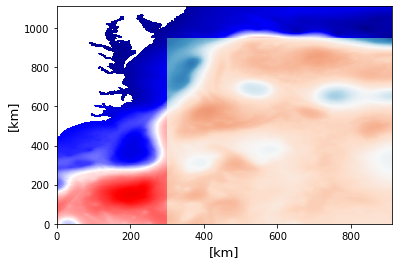

In [112]:
fig, ax = plt.subplots()
ax.pcolormesh(fesom01w_H.isel(time=0).XC*1e-3, fesom01w_H.isel(time=0).YC*1e-3,
              fesom01w_H.isel(time=0), cmap='seismic', vmax=1, vmin=-1)
ax.pcolormesh(fesom01w_H.isel(time=0).sel(YC=slice(None,9.5e5),XC=slice(3e5,None)).XC*1e-3,
              fesom01w_H.isel(time=0).sel(YC=slice(None,9.5e5),XC=slice(3e5,None)).YC*1e-3,
              fesom01w_H.isel(time=0).sel(YC=slice(None,9.5e5),XC=slice(3e5,None)), 
              cmap='RdBu_r', vmax=1, vmin=-1)
ax.set_xlabel("[km]", fontsize=13)
ax.set_ylabel("[km]", fontsize=13)

In [13]:
Ny = len(llc01s.j)
Nx = len(llc01s.i)
dx = llc01s.dxC.mean(skipna=True)
dy = llc01s.dyC.mean(skipna=True)

if 1/(2*dx) > 1/(2*dy):
    Kllc = 1/(2*dy)
else:
    Kllc = 1/(2*dx)
llc01s_H = xr.DataArray(llc01s.Eta.data, dims=['time','YC','XC'],
                        coords={'time':np.arange(len(llc01s.time))*3600,
                                'YC':np.arange(0,(Ny)*dy,dy),
                                'XC':np.arange(0,(Nx)*dx,dx)}
                       ).chunk({'time':1})

llc01s_H

<xarray.DataArray 'getitem-b8faa2626ef8f34e7260a7709a4abbe8' (time: 2208, YC: 321, XC: 242)>
dask.array<getitem, shape=(2208, 321, 242), dtype=float32, chunksize=(1, 321, 242), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 3600 7200 10800 ... 7934400 7938000 7941600 7945200
  * YC       (YC) float64 0.0 3.785e+03 7.571e+03 ... 1.208e+06 1.211e+06
  * XC       (XC) float64 0.0 3.491e+03 6.983e+03 ... 8.38e+05 8.414e+05

In [14]:
Ny = len(llc01w.j)
Nx = len(llc01w.i)
dx = llc01w.dxC.mean(skipna=True)
dy = llc01w.dyC.mean(skipna=True)

if 1/(2*dx) > 1/(2*dy):
    Kllc = 1/(2*dy)
else:
    Kllc = 1/(2*dx)
llc01w_H = xr.DataArray(llc01w.Eta.data, dims=['time','YC','XC'],
                        coords={'time':np.arange(len(llc01w.time))*3600,
                                'YC':np.arange(0,(Ny)*dy,dy),
                                'XC':np.arange(0,(Nx)*dx,dx)}
                       ).chunk({'time':1})

llc01w_H

<xarray.DataArray 'getitem-3bcb354119981b271eacf900cb3f4eaa' (time: 2160, YC: 321, XC: 242)>
dask.array<getitem, shape=(2160, 321, 242), dtype=float32, chunksize=(1, 321, 242), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 3600 7200 10800 ... 7761600 7765200 7768800 7772400
  * YC       (YC) float64 0.0 3.785e+03 7.571e+03 ... 1.208e+06 1.211e+06
  * XC       (XC) float64 0.0 3.491e+03 6.983e+03 ... 8.38e+05 8.414e+05

Text(0, 0.5, '[km]')

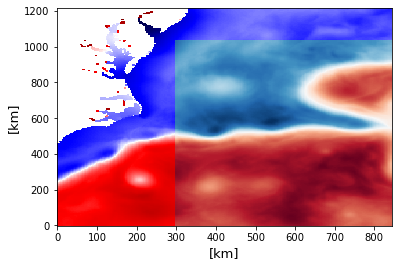

In [15]:
fig, ax = plt.subplots()
ax.pcolormesh(llc01w_H.isel(time=0).XC*1e-3, llc01w_H.isel(time=0).YC*1e-3,
              llc01w_H.isel(time=0), cmap='seismic')
ax.pcolormesh(llc01w_H.isel(time=0).sel(YC=slice(None,10.3e5),XC=slice(3e5,None)).XC*1e-3,
              llc01w_H.isel(time=0).sel(YC=slice(None,10.3e5),XC=slice(3e5,None)).YC*1e-3,
              llc01w_H.isel(time=0).sel(YC=slice(None,10.3e5),XC=slice(3e5,None)), 
              cmap='RdBu_r')
ax.set_xlabel("[km]", fontsize=13)
ax.set_ylabel("[km]", fontsize=13)

In [32]:
Fenatlw_H = xrft.dft(xrft.dft(enatl01w_H.sel(YC=slice(None,9.5e5),
                                             XC=slice(3e5,None)).fillna(0.), 
                              dim=['YC','XC'], window='hann', detrend='linear', true_phase=True, true_amplitude=True
                             ).chunk({'time':-1,'freq_YC':100,'freq_XC':100}),
                     dim=['time'], window='hann', detrend='linear', true_phase=True, true_amplitude=True
                    )
Fenatlw_H = Fenatlw_H.isel(freq_time=slice(len(Fenatlw_H.freq_time)//2,None)) * 2

Fenatls_H = xrft.dft(xrft.dft(enatl01s_H.sel(YC=slice(None,9.5e5),
                                             XC=slice(3e5,None)).fillna(0.), 
                              dim=['YC','XC'], window='hann', detrend='linear', true_phase=True, true_amplitude=True
                             ).chunk({'time':-1,'freq_YC':100,'freq_XC':100}),
                     dim=['time'], window='hann', detrend='linear', true_phase=True, true_amplitude=True
                    )
Fenatls_H = Fenatls_H.isel(freq_time=slice(len(Fenatls_H.freq_time)//2,None)) * 2

Fenatls_H

<xarray.DataArray (freq_time: 732, freq_YC: 660, freq_XC: 412)>
dask.array<mul, shape=(732, 660, 412), dtype=complex128, chunksize=(732, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * freq_YC    (freq_YC) float64 -0.0003469 -0.0003459 ... 0.0003448 0.0003459
  * freq_XC    (freq_XC) float64 -0.0003303 -0.0003287 ... 0.0003271 0.0003287
  * freq_time  (freq_time) float64 0.0 1.897e-07 ... 0.0001385 0.0001387

In [33]:
tmp_path = f'{SCRATCH}/region01/eNATL60/'+f'SSH_omega-k-l_fma.zarr'
store_tmp = gcs.get_mapper(tmp_path)
Fenatlw_H.to_dataset(name='spectra').to_zarr(store_tmp, mode='w')
print(tmp_path)

tmp_path = f'{SCRATCH}/region01/eNATL60/'+f'SSH_omega-k-l_aso.zarr'
store_tmp = gcs.get_mapper(tmp_path)
Fenatls_H.to_dataset(name='spectra').to_zarr(store_tmp, mode='w')
print(tmp_path)

gcs://meom-ige-scratch/roxyboy/region01/eNATL60/SSH_omega-k-l_fma.zarr
gcs://meom-ige-scratch/roxyboy/region01/eNATL60/SSH_omega-k-l_aso.zarr


In [34]:
Fenatlw_H = xr.open_zarr(gcs.get_mapper(f"gcs://meom-ige-scratch/roxyboy/region01/eNATL60/SSH_omega-k-l_fma.zarr")).spectra
isoFenatlw_H = isotropize(np.abs(Fenatlw_H.chunk({'freq_time':10}))**2, 
                          ['freq_YC','freq_XC'], nfactor=4, kwargs={'truncate':True}
                         ).compute() 
Fenatls_H = xr.open_zarr(gcs.get_mapper(f"gcs://meom-ige-scratch/roxyboy/region01/eNATL60/SSH_omega-k-l_aso.zarr")).spectra
isoFenatls_H = isotropize(np.abs(Fenatls_H.chunk({'freq_time':10}))**2, 
                          ['freq_YC','freq_XC'], nfactor=4, kwargs={'truncate':True}
                         ).compute() 
isoFenatlw_H

<xarray.DataArray (freq_time: 1068, freq_r: 103)>
array([[4.02612130e+26, 9.79296071e+25, 3.05022090e+24, ...,
        2.49154114e+15, 3.59922197e+15, 3.46865472e+15],
       [6.48348550e+26, 2.13910871e+26, 8.80670492e+24, ...,
        5.64202577e+15, 7.45201006e+15, 8.61084762e+15],
       [4.66700161e+26, 1.87352755e+26, 1.15191303e+25, ...,
        8.55400510e+15, 1.09935110e+16, 1.25493115e+16],
       ...,
       [1.07277904e+19, 3.69417856e+16, 7.11860778e+15, ...,
        5.85506693e+14, 5.80810184e+14, 4.48694739e+14],
       [2.98105642e+18, 1.20396053e+17, 7.56852321e+15, ...,
        6.00573921e+14, 6.97175837e+14, 7.55614543e+14],
       [3.74498334e+18, 1.46427675e+17, 9.85769378e+15, ...,
        5.52221016e+14, 5.71338801e+14, 5.48645482e+14]])
Coordinates:
  * freq_time  (freq_time) float64 0.0 1.3e-07 2.601e-07 ... 0.0001386 0.0001388
  * freq_r     (freq_r) float64 3.119e-06 7.204e-06 ... 0.0004718 0.000476

In [101]:
Fhycomw_H = xrft.dft(xrft.dft(hycom01w_H.sel(YC=slice(None,9.5e5),
                                             XC=slice(3e5,None)).fillna(0.), 
                              dim=['YC','XC'], window='hann', detrend='linear', true_phase=True, true_amplitude=True
                             ).chunk({'time':-1,'freq_YC':100,'freq_XC':100}),
                     dim=['time'], window='hann', detrend='linear', true_phase=True, true_amplitude=True
                    )
Fhycomw_H = Fhycomw_H.isel(freq_time=slice(len(Fhycomw_H.freq_time)//2,None)) * 2

Fhycoms_H = xrft.dft(xrft.dft(hycom01s_H.sel(YC=slice(None,9.5e5),
                                             XC=slice(3e5,None)).fillna(0.), 
                              dim=['YC','XC'], window='hann', detrend='linear', true_phase=True, true_amplitude=True
                             ).chunk({'time':-1,'freq_YC':100,'freq_XC':100}),
                     dim=['time'], window='hann', detrend='linear', true_phase=True, true_amplitude=True
                    )
Fhycoms_H = Fhycoms_H.isel(freq_time=slice(len(Fhycoms_H.freq_time)//2,None)) * 2

Fhycoms_H

<xarray.DataArray (freq_time: 1104, freq_YC: 523, freq_XC: 337)>
dask.array<mul, shape=(1104, 523, 337), dtype=complex128, chunksize=(1104, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * freq_YC    (freq_YC) float64 -0.0002747 -0.0002736 ... 0.0002736 0.0002747
  * freq_XC    (freq_XC) float64 -0.0002744 -0.0002727 ... 0.0002727 0.0002744
  * freq_time  (freq_time) float64 0.0 1.258e-07 ... 0.0001386 0.0001388

In [102]:
tmp_path = f'{SCRATCH}/region01/HYCOM50/'+f'SSH_omega-k-l_fma.zarr'
store_tmp = gcs.get_mapper(tmp_path)
Fhycomw_H.to_dataset(name='spectra').to_zarr(store_tmp, mode='w')
print(tmp_path)

tmp_path = f'{SCRATCH}/region01/HYCOM50/'+f'SSH_omega-k-l_aso.zarr'
store_tmp = gcs.get_mapper(tmp_path)
Fhycoms_H.to_dataset(name='spectra').to_zarr(store_tmp, mode='w')
print(tmp_path)

gcs://meom-ige-scratch/roxyboy/region01/HYCOM50/SSH_omega-k-l_fma.zarr
gcs://meom-ige-scratch/roxyboy/region01/HYCOM50/SSH_omega-k-l_aso.zarr


In [103]:
Fhycomw_H = xr.open_zarr(gcs.get_mapper(f"gcs://meom-ige-scratch/roxyboy/region01/HYCOM50/SSH_omega-k-l_fma.zarr")).spectra
isoFhycomw_H = isotropize(np.abs(Fhycomw_H.chunk({'freq_time':10}))**2, 
                          ['freq_YC','freq_XC'], nfactor=4, kwargs={'truncate':True}
                         ).compute() 
Fhycoms_H = xr.open_zarr(gcs.get_mapper(f"gcs://meom-ige-scratch/roxyboy/region01/HYCOM50/SSH_omega-k-l_aso.zarr")).spectra
isoFhycoms_H = isotropize(np.abs(Fhycoms_H.chunk({'freq_time':10}))**2, 
                          ['freq_YC','freq_XC'], nfactor=4, kwargs={'truncate':True}
                         ).compute() 
isoFhycomw_H

<xarray.DataArray (freq_time: 1080, freq_r: 84)>
array([[1.17132265e+27, 1.32872853e+26, 2.56590149e+24, ...,
        6.33244638e+17, 6.28504550e+17, 6.11962200e+17],
       [1.87819665e+27, 1.47940065e+26, 5.96270145e+24, ...,
        1.88881245e+18, 1.62618879e+18, 2.00760130e+18],
       [1.17855831e+27, 1.47439391e+26, 7.16103861e+24, ...,
        3.23023458e+18, 2.81489195e+18, 3.08112650e+18],
       ...,
       [5.16100234e+17, 2.99341195e+15, 2.78479657e+15, ...,
        2.64593020e+18, 2.33064300e+18, 2.12366981e+18],
       [1.40255834e+17, 3.46795667e+15, 2.93675207e+15, ...,
        2.50211993e+18, 2.35605743e+18, 2.46857633e+18],
       [1.62606697e+18, 3.40840250e+15, 2.81863124e+15, ...,
        3.21387287e+18, 2.63049302e+18, 2.56828751e+18]])
Coordinates:
  * freq_time  (freq_time) float64 0.0 1.286e-07 ... 0.0001386 0.0001388
  * freq_r     (freq_r) float64 3.146e-06 7.274e-06 ... 0.000381 0.0003853

In [38]:
Fgigatlw_H = xrft.dft(gigatl01w_H.sel(YC=slice(1e5,9.5e5),XC=slice(7e5,None)
                                     ).chunk({'YC':-1,'XC':-1}).fillna(0.), 
                      dim=['YC','XC'], window='hann', detrend='linear', true_phase=True, true_amplitude=True
                     ).chunk({'time':-1,'freq_YC':100,'freq_XC':100})

Fgigatlw_H = xrft.dft(Fgigatlw_H,
                      dim=['time'], window='hann', detrend='linear', true_phase=True, true_amplitude=True
                     )
Fgigatlw_H = Fgigatlw_H.isel(freq_time=slice(len(Fgigatlw_H.freq_time)//2,None)).chunk({'freq_time':10}) * 2
Fgigatlw_H

,Array,Chunk
Bytes,12.31 GB,1.60 MB
Shape,"(1140, 889, 759)","(10, 100, 100)"
Count,31210 Tasks,8208 Chunks
Type,complex128,numpy.ndarray


In [39]:
tmp_path = f'{SCRATCH}/region01/GIGATL/'+f'SSH_omega-k-l_fma.zarr'
store_tmp = gcs.get_mapper(tmp_path)
Fgigatlw_H.to_dataset(name='spectra').to_zarr(store_tmp, mode='w')
print(tmp_path)

gcs://meom-ige-scratch/roxyboy/region01/GIGATL/SSH_omega-k-l_fma.zarr


In [40]:
Fgigatls_H = xrft.dft(gigatl01s_H.sel(YC=slice(1e5,9.5e5),XC=slice(7e5,None)
                                     ).chunk({'YC':-1,'XC':-1}).fillna(0.), 
                      dim=['YC','XC'], window='hann', detrend='linear', true_phase=True, true_amplitude=True
                     ).chunk({'time':-1,'freq_YC':100,'freq_XC':100})

Fgigatls_H = xrft.dft(Fgigatls_H,
                      dim=['time'], window='hann', detrend='linear', true_phase=True, true_amplitude=True
                     )
Fgigatls_H = Fgigatls_H.isel(freq_time=slice(len(Fgigatls_H.freq_time)//2,None)).chunk({'freq_time':10}) * 2
Fgigatls_H

,Array,Chunk
Bytes,12.31 GB,1.60 MB
Shape,"(1140, 889, 759)","(10, 100, 100)"
Count,31210 Tasks,8208 Chunks
Type,complex128,numpy.ndarray


In [41]:
tmp_path = f'{SCRATCH}/region01/GIGATL/'+f'SSH_omega-k-l_aso.zarr'
store_tmp = gcs.get_mapper(tmp_path)
Fgigatls_H.to_dataset(name='spectra').to_zarr(store_tmp, mode='w')
print(tmp_path)

gcs://meom-ige-scratch/roxyboy/region01/GIGATL/SSH_omega-k-l_aso.zarr


In [43]:
Fgigatlw_H = xr.open_zarr(gcs.get_mapper(f"gcs://meom-ige-scratch/roxyboy/region01/GIGATL/SSH_omega-k-l_fma.zarr")).spectra
isoFgigatlw_H = isotropize(np.abs(Fgigatlw_H)**2, 
                           ['freq_YC','freq_XC'], nfactor=4, kwargs={'truncate':True}
                          ).compute()
isoFgigatlw_H

<xarray.DataArray (freq_time: 1140, freq_r: 189)>
array([[3.90198214e+26, 1.91504645e+26, 6.66405542e+24, ...,
        2.65332861e+14, 4.05143252e+14, 2.57963012e+14],
       [6.43607832e+26, 5.22761697e+26, 1.39133247e+25, ...,
        7.52262374e+14, 9.39161436e+14, 5.73107656e+14],
       [4.23234822e+26, 4.64871610e+26, 2.10356210e+25, ...,
        1.20155918e+15, 1.27095359e+15, 6.74474183e+14],
       ...,
       [3.07755859e+17, 4.22476930e+14, 4.33699082e+13, ...,
        1.05292311e+14, 7.14373580e+13, 1.30952096e+14],
       [2.15077969e+17, 3.08694625e+14, 3.92263729e+13, ...,
        8.06314414e+13, 7.88812772e+13, 1.21820889e+14],
       [6.97692592e+17, 5.20951029e+14, 3.05174933e+13, ...,
        9.09039392e+13, 6.32471953e+13, 9.42616755e+13]])
Coordinates:
  * freq_time  (freq_time) float64 0.0 1.218e-07 ... 0.0001386 0.0001388
  * freq_r     (freq_r) float64 2.65e-06 6.117e-06 ... 0.0007323 0.000736

In [44]:
Fgigatls_H = xr.open_zarr(gcs.get_mapper(f"gcs://meom-ige-scratch/roxyboy/region01/GIGATL/SSH_omega-k-l_aso.zarr")).spectra
isoFgigatls_H = isotropize(np.abs(Fgigatls_H)**2, 
                           ['freq_YC','freq_XC'], nfactor=4, kwargs={'truncate':True}
                          ).compute()
isoFgigatls_H

<xarray.DataArray (freq_time: 1140, freq_r: 189)>
array([[1.56176058e+26, 4.43645202e+25, 4.00041108e+24, ...,
        1.05683747e+13, 1.19388120e+13, 8.11484437e+12],
       [2.97275176e+26, 1.12206865e+26, 9.51518505e+24, ...,
        1.11735641e+13, 1.26665690e+13, 7.80855684e+12],
       [2.07209195e+26, 1.07692401e+26, 1.20473304e+25, ...,
        4.17256323e+12, 5.09145071e+12, 3.80376923e+12],
       ...,
       [7.11233404e+16, 1.64499262e+14, 3.65853735e+13, ...,
        5.19680825e+11, 4.86190178e+11, 5.68786329e+11],
       [9.64522203e+16, 4.02134117e+14, 2.65477008e+13, ...,
        6.03252667e+11, 5.43615860e+11, 6.72609608e+11],
       [3.51672685e+17, 3.46208316e+14, 2.23716308e+13, ...,
        7.07088123e+11, 5.47948465e+11, 4.73838322e+11]])
Coordinates:
  * freq_time  (freq_time) float64 0.0 1.218e-07 ... 0.0001386 0.0001388
  * freq_r     (freq_r) float64 2.65e-06 6.117e-06 ... 0.0007323 0.000736

In [113]:
Ffesomw_H = xrft.dft(xrft.dft(fesom01w_H.sel(YC=slice(None,9.5e5),
                                             XC=slice(3e5,None)).fillna(0.), 
                              dim=['YC','XC'], window='hann', detrend='linear', true_phase=True, true_amplitude=True
                             ).chunk({'time':-1,'freq_YC':100,'freq_XC':100}),
                     dim=['time'], window='hann', detrend='linear', true_phase=True, true_amplitude=True
                    )
Ffesomw_H = Ffesomw_H.isel(freq_time=slice(len(Ffesomw_H.freq_time)//2,None)) * 2

Ffesoms_H = xrft.dft(xrft.dft(fesom01s_H.sel(YC=slice(None,9.5e5),
                                             XC=slice(3e5,None)).fillna(0.), 
                              dim=['YC','XC'], window='hann', detrend='linear', true_phase=True, true_amplitude=True
                             ).chunk({'time':-1,'freq_YC':100,'freq_XC':100}),
                     dim=['time'], window='hann', detrend='linear', true_phase=True, true_amplitude=True
                    )
Ffesoms_H = Ffesoms_H.isel(freq_time=slice(len(Ffesoms_H.freq_time)//2,None)) * 2

Ffesoms_H

<xarray.DataArray (freq_time: 1104, freq_YC: 854, freq_XC: 670)>
dask.array<mul, shape=(1104, 854, 670), dtype=complex128, chunksize=(1104, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * freq_YC    (freq_YC) float64 -0.0004492 -0.0004482 ... 0.0004471 0.0004482
  * freq_XC    (freq_XC) float64 -0.0005491 -0.0005474 ... 0.0005458 0.0005474
  * freq_time  (freq_time) float64 0.0 1.258e-07 ... 0.0001386 0.0001388

In [114]:
tmp_path = f'{SCRATCH}/region01/FESOM/'+f'SSH_omega-k-l_fma.zarr'
store_tmp = gcs.get_mapper(tmp_path)
Ffesomw_H.to_dataset(name='spectra').to_zarr(store_tmp, mode='w')
print(tmp_path)

tmp_path = f'{SCRATCH}/region01/FESOM/'+f'SSH_omega-k-l_aso.zarr'
store_tmp = gcs.get_mapper(tmp_path)
Ffesoms_H.to_dataset(name='spectra').to_zarr(store_tmp, mode='w')
print(tmp_path)

gcs://meom-ige-scratch/roxyboy/region01/FESOM/SSH_omega-k-l_fma.zarr
gcs://meom-ige-scratch/roxyboy/region01/FESOM/SSH_omega-k-l_aso.zarr


In [115]:
Ffesomw_H = xr.open_zarr(gcs.get_mapper(f"gcs://meom-ige-scratch/roxyboy/region01/FESOM/SSH_omega-k-l_fma.zarr")).spectra
isoFfesomw_H = isotropize(np.abs(Ffesomw_H.chunk({'freq_time':10}))**2, 
                          ['freq_YC','freq_XC'], nfactor=4, kwargs={'truncate':True}
                         ).compute() 
Ffesoms_H = xr.open_zarr(gcs.get_mapper(f"gcs://meom-ige-scratch/roxyboy/region01/FESOM/SSH_omega-k-l_aso.zarr")).spectra
isoFfesoms_H = isotropize(np.abs(Ffesoms_H.chunk({'freq_time':10}))**2, 
                          ['freq_YC','freq_XC'], nfactor=4, kwargs={'truncate':True}
                         ).compute() 
isoFfesomw_H

<xarray.DataArray (freq_time: 1080, freq_r: 167)>
array([[1.86986173e+26, 5.93268507e+25, 1.76173067e+24, ...,
        4.99131817e+13, 4.30768427e+13, 2.43357496e+13],
       [3.05621148e+26, 1.20602502e+26, 3.60078192e+24, ...,
        1.20454977e+14, 1.09395984e+14, 1.30262531e+14],
       [2.41095201e+26, 9.72630750e+25, 5.41399451e+24, ...,
        1.57352274e+14, 1.49956820e+14, 1.69183218e+14],
       ...,
       [7.66655634e+16, 6.59960322e+13, 1.05498507e+12, ...,
        1.11410588e+13, 1.14172389e+13, 1.42566947e+13],
       [2.80123423e+16, 6.48573485e+13, 8.68760203e+11, ...,
        1.16268128e+13, 1.14173798e+13, 1.04376686e+13],
       [2.38728211e+16, 9.87638391e+13, 1.09588314e+12, ...,
        1.23237476e+13, 9.59978550e+12, 9.93975358e+12]])
Coordinates:
  * freq_time  (freq_time) float64 0.0 1.286e-07 ... 0.0001386 0.0001388
  * freq_r     (freq_r) float64 2.815e-06 6.685e-06 ... 0.0007028 0.0007067

In [46]:
Fllcw_H = xrft.dft(xrft.dft(llc01w_H.sel(YC=slice(None,10.3e5),XC=slice(3e5,None)).fillna(0.), 
                            dim=['YC','XC'], window='hann', detrend='linear', true_phase=True, true_amplitude=True
                           ).chunk({'time':-1,'freq_YC':100,'freq_XC':100}),
                   dim=['time'], window='hann', detrend='linear', true_phase=True, true_amplitude=True
                  )
Fllcw_H = Fllcw_H.isel(freq_time=slice(len(Fllcw_H.freq_time)//2,None)) * 2

Fllcs_H = xrft.dft(xrft.dft(llc01s_H.sel(YC=slice(None,10.3e5),XC=slice(3e5,None)).fillna(0.), 
                            dim=['YC','XC'], window='hann', detrend='linear', true_phase=True, true_amplitude=True
                           ).chunk({'time':-1,'freq_YC':100,'freq_XC':100}),
                   dim=['time'], window='hann', detrend='linear', true_phase=True, true_amplitude=True
                  )
Fllcs_H = Fllcs_H.isel(freq_time=slice(len(Fllcs_H.freq_time)//2,None)) * 2

Fllcs_H

<xarray.DataArray (freq_time: 1104, freq_YC: 273, freq_XC: 156)>
dask.array<mul, shape=(1104, 273, 156), dtype=complex128, chunksize=(1104, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * freq_YC    (freq_YC) float64 -0.0001316 -0.0001306 ... 0.0001306 0.0001316
  * freq_XC    (freq_XC) float64 -0.0001432 -0.0001414 ... 0.0001395 0.0001414
  * freq_time  (freq_time) float64 0.0 1.258e-07 ... 0.0001386 0.0001388

In [47]:
tmp_path = f'{SCRATCH}/region01/LLC4320/'+f'SSH_omega-k-l_fma.zarr'
print(tmp_path)
store_tmp = gcs.get_mapper(tmp_path)
Fllcw_H.to_dataset(name='spectra').to_zarr(store_tmp, mode='w')

gcs://meom-ige-scratch/roxyboy/region01/LLC4320/SSH_omega-k-l_fma.zarr


In [48]:
tmp_path = f'{SCRATCH}/region01/LLC4320/'+f'SSH_omega-k-l_aso.zarr'
print(tmp_path)
store_tmp = gcs.get_mapper(tmp_path)
Fllcs_H.to_dataset(name='spectra').to_zarr(store_tmp, mode='w')

gcs://meom-ige-scratch/roxyboy/region01/LLC4320/SSH_omega-k-l_aso.zarr


In [49]:
Fllcw_H = xr.open_zarr(gcs.get_mapper(f"gcs://meom-ige-scratch/roxyboy/region01/LLC4320/SSH_omega-k-l_fma.zarr")).spectra
isoFllcw_H = isotropize(np.abs(Fllcw_H.chunk({'freq_time':10}))**2, 
                        ['freq_YC','freq_XC'], nfactor=4, kwargs={'truncate':True}
                       ).compute() 
Fllcs_H = xr.open_zarr(gcs.get_mapper(f"gcs://meom-ige-scratch/roxyboy/region01/LLC4320/SSH_omega-k-l_aso.zarr")).spectra
isoFllcs_H = isotropize(np.abs(Fllcs_H.chunk({'freq_time':10}))**2, 
                        ['freq_YC','freq_XC'], nfactor=4, kwargs={'truncate':True}
                       ).compute() 
isoFllcw_H

<xarray.DataArray (freq_time: 1080, freq_r: 39)>
array([[2.31200413e+26, 3.62696811e+25, 9.72074765e+23, ...,
        1.30298814e+17, 1.27729250e+17, 1.23874461e+17],
       [4.84917043e+26, 6.97235877e+25, 2.29935012e+24, ...,
        3.06346509e+17, 2.27164872e+17, 2.37169193e+17],
       [4.67434929e+26, 7.04285884e+25, 3.50064468e+24, ...,
        4.61336384e+17, 2.44850905e+17, 3.30766214e+17],
       ...,
       [4.86119799e+17, 7.58554278e+14, 2.92398620e+13, ...,
        1.22328991e+16, 1.77823545e+16, 1.17033555e+16],
       [7.36874059e+17, 3.06221154e+14, 1.97227916e+13, ...,
        9.88210057e+15, 1.08982476e+16, 1.32881337e+16],
       [1.97457589e+18, 2.87836438e+14, 1.66593317e+13, ...,
        1.17091290e+16, 1.13937892e+16, 1.47119246e+16]])
Coordinates:
  * freq_time  (freq_time) float64 0.0 1.286e-07 ... 0.0001386 0.0001388
  * freq_r     (freq_r) float64 3.265e-06 7.79e-06 ... 0.0001868 0.0001913

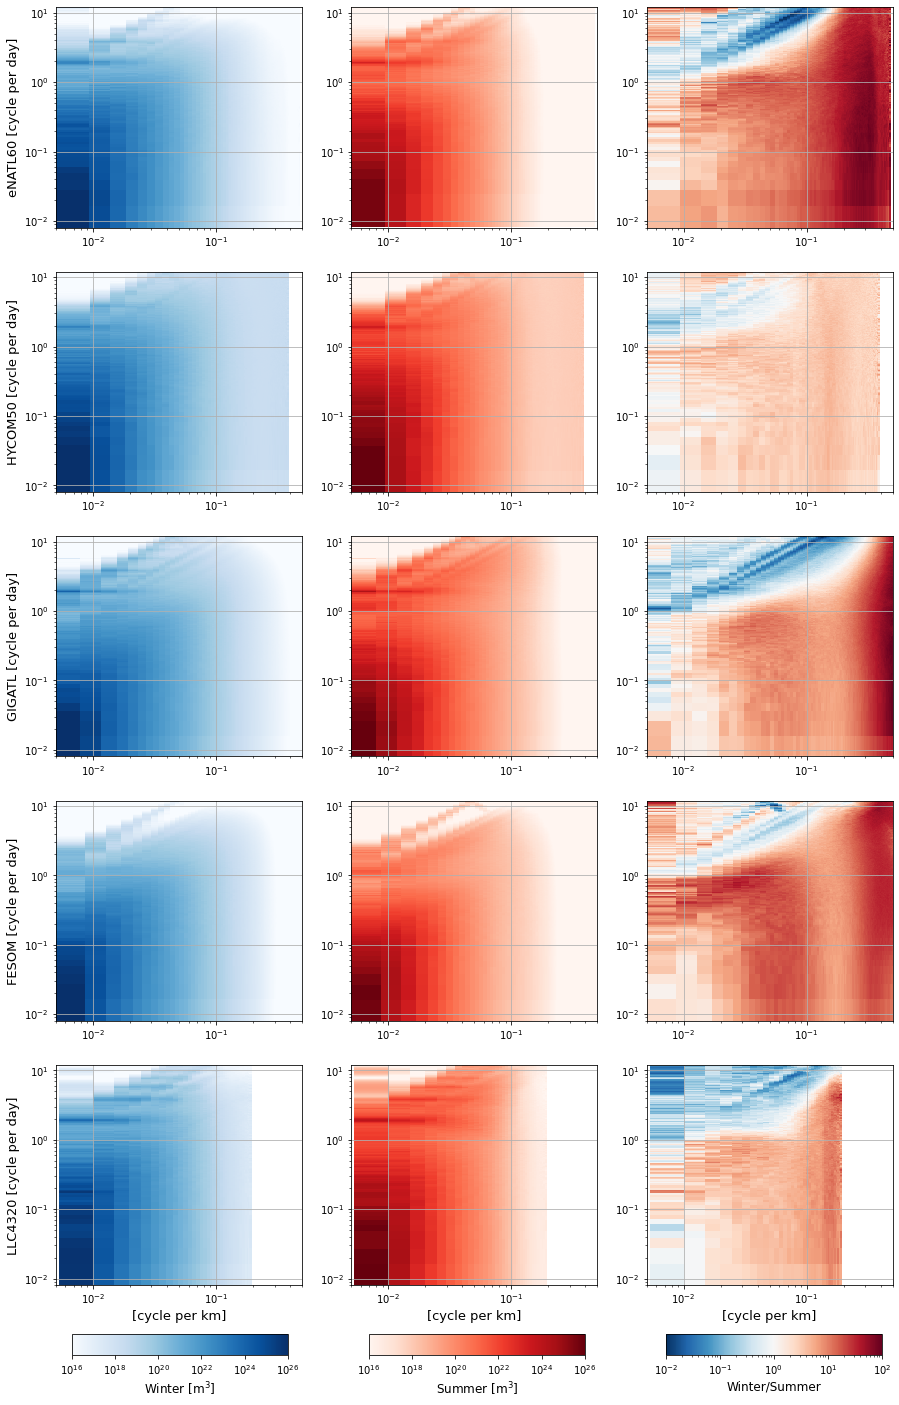

In [122]:
fig, axes = plt.subplots(figsize=(15,25), nrows=5, ncols=3)
# fig.set_tight_layout(True)
ax00 = axes[0,0]
ax01 = axes[0,1]
ax02 = axes[0,2]
ax10 = axes[1,0]
ax11 = axes[1,1]
ax12 = axes[1,2]
ax20 = axes[2,0]
ax21 = axes[2,1]
ax22 = axes[2,2]
ax30 = axes[3,0]
ax31 = axes[3,1]
ax32 = axes[3,2]
ax40 = axes[4,0]
ax41 = axes[4,1]
ax42 = axes[4,2]


im0 = ax00.pcolormesh(isoFenatlw_H.freq_r.isel(freq_r=slice(1,None))*1e3,
                      isoFenatlw_H.freq_time.isel(freq_time=slice(1,None))*86400,
                      isoFenatlw_H.isel(freq_r=slice(1,None),freq_time=slice(1,None)), 
                      cmap='Blues', norm=clr.LogNorm(vmin=1e16, vmax=1e26), 
                      rasterized=True)
ax10.pcolormesh(isoFhycomw_H.freq_r.isel(freq_r=slice(1,None))*1e3,
                isoFhycomw_H.freq_time.isel(freq_time=slice(1,None))*86400,
                isoFhycomw_H.isel(freq_r=slice(1,None),freq_time=slice(1,None)), 
                cmap='Blues', norm=clr.LogNorm(vmin=1e16, vmax=1e26), 
                rasterized=True)
ax20.pcolormesh(isoFgigatlw_H.freq_r.isel(freq_r=slice(1,None))*1e3,
                isoFgigatlw_H.freq_time.isel(freq_time=slice(1,None))*86400,
                isoFgigatlw_H.isel(freq_r=slice(1,None),freq_time=slice(1,None)), 
                cmap='Blues', norm=clr.LogNorm(vmin=1e16, vmax=1e26), 
                rasterized=True)
ax30.pcolormesh(isoFfesomw_H.freq_r.isel(freq_r=slice(1,None))*1e3,
                isoFfesomw_H.freq_time.isel(freq_time=slice(1,None))*86400,
                isoFfesomw_H.isel(freq_r=slice(1,None),freq_time=slice(1,None)), 
                cmap='Blues', norm=clr.LogNorm(vmin=1e16, vmax=1e26),
                rasterized=True)
ax40.pcolormesh(isoFllcw_H.freq_r.isel(freq_r=slice(1,None))*1e3,
                isoFllcw_H.freq_time.isel(freq_time=slice(1,None))*86400,
                isoFllcw_H.isel(freq_r=slice(1,None),freq_time=slice(1,None)), 
                cmap='Blues', norm=clr.LogNorm(vmin=1e16, vmax=1e26),
                rasterized=True)

im1 = ax01.pcolormesh(isoFenatls_H.freq_r.isel(freq_r=slice(1,None))*1e3, 
                      isoFenatls_H.freq_time.isel(freq_time=slice(1,None))*86400, 
                      isoFenatls_H.isel(freq_r=slice(1,None),freq_time=slice(1,None)), 
                      cmap='Reds', norm=clr.LogNorm(vmin=1e16, vmax=1e26), 
                      rasterized=True)
ax11.pcolormesh(isoFhycoms_H.freq_r.isel(freq_r=slice(1,None))*1e3,
                isoFhycoms_H.freq_time.isel(freq_time=slice(1,None))*86400,
                isoFhycoms_H.isel(freq_r=slice(1,None),freq_time=slice(1,None)), 
                cmap='Reds', norm=clr.LogNorm(vmin=1e16, vmax=1e26), 
                rasterized=True)
ax21.pcolormesh(isoFgigatls_H.freq_r.isel(freq_r=slice(1,None))*1e3,
                isoFgigatls_H.freq_time.isel(freq_time=slice(1,None))*86400,
                isoFgigatls_H.isel(freq_r=slice(1,None),freq_time=slice(1,None)), 
                cmap='Reds', norm=clr.LogNorm(vmin=1e16, vmax=1e26), 
                rasterized=True)
ax31.pcolormesh(isoFfesoms_H.freq_r.isel(freq_r=slice(1,None))*1e3, 
                isoFfesoms_H.freq_time.isel(freq_time=slice(1,None))*86400, 
                isoFfesoms_H.isel(freq_r=slice(1,None),freq_time=slice(1,None)), 
                cmap='Reds', norm=clr.LogNorm(vmin=1e16, vmax=1e26),
                rasterized=True)
ax41.pcolormesh(isoFllcs_H.freq_r.isel(freq_r=slice(1,None))*1e3, 
                isoFllcs_H.freq_time.isel(freq_time=slice(1,None))*86400, 
                isoFllcs_H.isel(freq_r=slice(1,None),freq_time=slice(1,None)), 
                cmap='Reds', norm=clr.LogNorm(vmin=1e16, vmax=1e26),
                rasterized=True)

im2 = ax02.pcolormesh(isoFenatlw_H.freq_r.isel(freq_r=slice(1,None))*1e3, 
                      isoFenatlw_H.freq_time.isel(freq_time=slice(1,None))*86400, 
                      (isoFenatlw_H.isel(freq_r=slice(1,None),freq_time=slice(1,None))
                       / isoFenatls_H.isel(freq_r=slice(1,None),freq_time=slice(1,None)
                                          ).interp(freq_time=isoFenatlw_H.freq_time, 
                                                   kwargs={'fill_value':'extrapolate'})
                      ), 
                      cmap='RdBu_r', norm=clr.LogNorm(vmin=1e-2, vmax=1e2), 
                      rasterized=True)
ax12.pcolormesh(isoFhycomw_H.freq_r.isel(freq_r=slice(1,None))*1e3,
                isoFhycomw_H.freq_time.isel(freq_time=slice(1,None))*86400,
                (isoFhycomw_H.isel(freq_r=slice(1,None),freq_time=slice(1,None))
                 / isoFhycoms_H.isel(freq_r=slice(1,None),freq_time=slice(1,None)
                                    ).interp(freq_time=isoFhycomw_H.freq_time.isel(freq_time=slice(1,None)))
                ), 
                cmap='RdBu_r', norm=clr.LogNorm(vmin=1e-2, vmax=1e2), 
                rasterized=True)
ax22.pcolormesh(isoFgigatlw_H.freq_r.isel(freq_r=slice(1,None))*1e3,
                isoFgigatlw_H.freq_time.isel(freq_time=slice(1,None))*86400,
                (isoFgigatlw_H.isel(freq_r=slice(1,None),freq_time=slice(1,None))
                 / isoFgigatls_H.isel(freq_r=slice(1,None),freq_time=slice(1,None)
                                     ).interp(freq_time=isoFgigatlw_H.freq_time.isel(freq_time=slice(1,None)))
                ), 
                cmap='RdBu_r', norm=clr.LogNorm(vmin=1e-2, vmax=1e2), 
                rasterized=True)
ax32.pcolormesh(isoFfesomw_H.freq_r.isel(freq_r=slice(1,None))*1e3,
                isoFfesomw_H.freq_time.isel(freq_time=slice(1,None))*86400,
                (isoFfesomw_H.isel(freq_r=slice(1,None),freq_time=slice(1,None))
                 / isoFfesoms_H.isel(freq_r=slice(1,None),freq_time=slice(1,None)
                                  ).interp(freq_time=isoFfesomw_H.freq_time.isel(freq_time=slice(1,None)))
                ), 
                cmap='RdBu_r', norm=clr.LogNorm(vmin=1e-2, vmax=1e2), 
                rasterized=True)
ax42.pcolormesh(isoFllcw_H.freq_r.isel(freq_r=slice(1,None))*1e3,
                isoFllcw_H.freq_time.isel(freq_time=slice(1,None))*86400,
                (isoFllcw_H.isel(freq_r=slice(1,None),freq_time=slice(1,None))
                 / isoFllcs_H.isel(freq_r=slice(1,None),freq_time=slice(1,None)
                                  ).interp(freq_time=isoFllcw_H.freq_time.isel(freq_time=slice(1,None)))
                ), 
                cmap='RdBu_r', norm=clr.LogNorm(vmin=1e-2, vmax=1e2), 
                rasterized=True)


ax00.set_xlim([5e-3,5e-1])
ax01.set_xlim([5e-3,5e-1])
ax02.set_xlim([5e-3,5e-1])
ax10.set_xlim([5e-3,5e-1])
ax11.set_xlim([5e-3,5e-1])
ax12.set_xlim([5e-3,5e-1])
ax20.set_xlim([5e-3,5e-1])
ax21.set_xlim([5e-3,5e-1])
ax22.set_xlim([5e-3,5e-1])
ax30.set_xlim([5e-3,5e-1])
ax31.set_xlim([5e-3,5e-1])
ax32.set_xlim([5e-3,5e-1])
ax40.set_xlim([5e-3,5e-1])
ax41.set_xlim([5e-3,5e-1])
ax42.set_xlim([5e-3,5e-1])
ax00.set_ylim([8e-3,None])
ax01.set_ylim([8e-3,None])
ax02.set_ylim([8e-3,None])
ax10.set_ylim([8e-3,None])
ax11.set_ylim([8e-3,None])
ax12.set_ylim([8e-3,None])
ax20.set_ylim([8e-3,None])
ax21.set_ylim([8e-3,None])
ax22.set_ylim([8e-3,None])
ax30.set_ylim([8e-3,None])
ax31.set_ylim([8e-3,None])
ax32.set_ylim([8e-3,None])
ax40.set_ylim([8e-3,None])
ax41.set_ylim([8e-3,None])
ax42.set_ylim([8e-3,None])

ax00.set_xscale('log')
ax00.set_yscale('log')
ax01.set_xscale('log')
ax01.set_yscale('log')
ax02.set_xscale('log')
ax02.set_yscale('log')
ax10.set_xscale('log')
ax10.set_yscale('log')
ax11.set_xscale('log')
ax11.set_yscale('log')
ax12.set_xscale('log')
ax12.set_yscale('log')
ax20.set_xscale('log')
ax20.set_yscale('log')
ax21.set_xscale('log')
ax21.set_yscale('log')
ax22.set_xscale('log')
ax22.set_yscale('log')
ax30.set_xscale('log')
ax30.set_yscale('log')
ax31.set_xscale('log')
ax31.set_yscale('log')
ax32.set_xscale('log')
ax32.set_yscale('log')
ax40.set_xscale('log')
ax40.set_yscale('log')
ax41.set_xscale('log')
ax41.set_yscale('log')
ax42.set_xscale('log')
ax42.set_yscale('log')

ax40.set_xlabel(r"[cycle per km]", fontsize=13)
ax41.set_xlabel(r"[cycle per km]", fontsize=13)
ax42.set_xlabel(r"[cycle per km]", fontsize=13)
ax00.set_ylabel(r"eNATL60 [cycle per day]", fontsize=13)
ax10.set_ylabel(r"HYCOM50 [cycle per day]", fontsize=13)
ax20.set_ylabel(r"GIGATL [cycle per day]", fontsize=13)
ax30.set_ylabel(r"FESOM [cycle per day]", fontsize=13)
ax40.set_ylabel(r"LLC4320 [cycle per day]", fontsize=13)

ax00.grid(True)
ax01.grid(True)
ax02.grid(True)
ax10.grid(True)
ax11.grid(True)
ax12.grid(True)
ax20.grid(True)
ax21.grid(True)
ax22.grid(True)
ax30.grid(True)
ax31.grid(True)
ax32.grid(True)
ax40.grid(True)
ax41.grid(True)
ax42.grid(True)

fig.subplots_adjust(bottom=.17, hspace=.2) 
cbax0 = fig.add_axes([0.14, 0.131, 0.2, 0.012])
cbar0 = fig.colorbar(im0, orientation='horizontal', cax=cbax0)
cbar0.set_label(r"Winter [m$^3$]", fontsize=12)

cbax1 = fig.add_axes([0.415, 0.131, 0.2, 0.012])
cbar1 = fig.colorbar(im1, orientation='horizontal', cax=cbax1)
cbar1.set_label(r"Summer [m$^3$]", fontsize=12)

cbax2 = fig.add_axes([0.69, 0.131, 0.2, 0.012])
cbar2 = fig.colorbar(im2, orientation='horizontal', cax=cbax2)
cbar2.set_label(r"Winter/Summer", fontsize=12)

plt.savefig('/home/jovyan/Figures/omega-k-spectra_surfH_01.pdf')

In [ ]:
client.close()